In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/input"

In [5]:
!kaggle datasets download -d alaahussien/breast-canser

  0% 0.00/42.8k [00:00<?, ?B/s]
100% 42.8k/42.8k [00:00<00:00, 63.5MB/s]


In [6]:
!unzip \*.zip  && rm *.zip

Archive:  breast-canser.zip
  inflating: Breast_Cancer.csv       


In [7]:
df = pd.read_csv("Breast_Cancer.csv",index_col = 0)
df.head(20)

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
Age,,,,,,,,,,,,,,,
68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive
51,White,Married,T1,N1,IIA,Well differentiated,1,Regional,8,Positive,Positive,11,1,54,Alive
40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,9,1,14,Dead
40,White,Divorced,T4,N3,IIIC,Poorly differentiated,3,Regional,103,Positive,Positive,20,18,70,Alive


In [ ]:
df["Status"].value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4024 entries, 68 to 46
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Race                    4024 non-null   object
 1   Marital Status          4024 non-null   object
 2   T Stage                 4024 non-null   object
 3   N Stage                 4024 non-null   object
 4   6th Stage               4024 non-null   object
 5   differentiate           4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: in

In [9]:
df.isnull().sum()

Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [10]:
df.drop(["Status"],axis=1, inplace=True)

In [11]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
Age,,,,,,,,,,,,,,
68,2,1,0,0,0,1,3,1,4,1,1,24,1,60
50,2,1,1,1,2,0,2,1,35,1,1,14,5,62
58,2,0,2,2,4,0,2,1,63,1,1,14,7,75
58,2,1,0,0,0,1,3,1,18,1,1,2,1,84
47,2,1,1,0,1,1,3,1,41,1,1,3,1,50


In [12]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)


In [13]:
pca = PCA(n_components = 3)
pca.fit(df_std)
pca.components_

array([[-0.02265589,  0.00775532,  0.34462564,  0.44649544,  0.49560557,
        -0.04936439,  0.14018744, -0.19767117,  0.32486529, -0.11209969,
        -0.10405946,  0.22588899,  0.42568108, -0.11554668],
       [-0.13069256,  0.04511686, -0.11553671, -0.07334387, -0.10186183,
        -0.18315697,  0.38668677,  0.046923  , -0.10335654, -0.5996558 ,
        -0.59700782, -0.05741838, -0.0863027 , -0.17050547],
       [-0.02643188, -0.00916592, -0.56680947,  0.31113495,  0.04003273,
        -0.01980864, -0.00163973, -0.00102651, -0.57307083,  0.03374313,
         0.05393033,  0.33914911,  0.36283517,  0.0034539 ]])

In [14]:

pca.transform(df_std)
scores_pca = pca.transform(df_std)
scores_pca

array([[-1.44252977,  0.44220098,  1.25694449],
       [ 0.78581173, -0.56045491,  0.07476637],
       [ 3.18720195, -1.2880016 , -0.76104059],
       ...,
       [-0.46023377,  1.26905739, -0.46181845],
       [-0.50538988,  0.01684838, -0.9557307 ],
       [-0.96316652, -0.53217399, -0.77035043]])

In [15]:
df_std = pd.DataFrame(data = df_std,columns = df.columns)
df_std.head()

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,0.39716,-0.349103,-1.025287,-0.632209,-1.043706,0.304678,1.351806,0.152963,-1.253661,0.267652,0.458107,1.190676,-0.618172,-0.492961
1,0.39716,-0.349103,0.281158,0.809974,0.535491,-0.679291,-0.205054,0.152963,0.214345,0.267652,0.458107,-0.044095,0.164807,-0.405695
2,0.39716,-1.289389,1.587604,2.252157,2.114687,-0.679291,-0.205054,0.152963,1.540287,0.267652,0.458107,-0.044095,0.556296,0.161530
3,0.39716,-0.349103,-1.025287,-0.632209,-1.043706,0.304678,1.351806,0.152963,-0.590691,0.267652,0.458107,-1.525820,-0.618172,0.554224
4,0.39716,-0.349103,0.281158,-0.632209,-0.254108,0.304678,1.351806,0.152963,0.498475,0.267652,0.458107,-1.402343,-0.618172,-0.929288


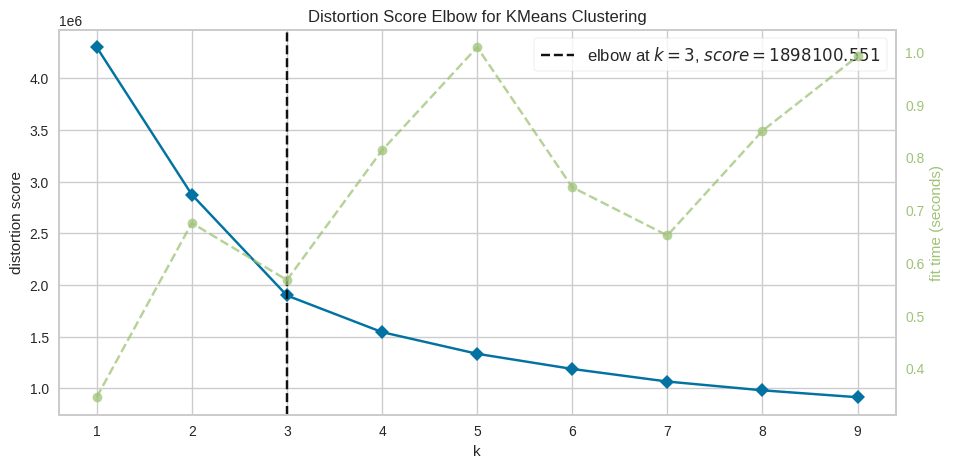

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from yellowbrick.cluster import KElbowVisualizer
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10),size=(1080, 500),n_init='auto')

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()

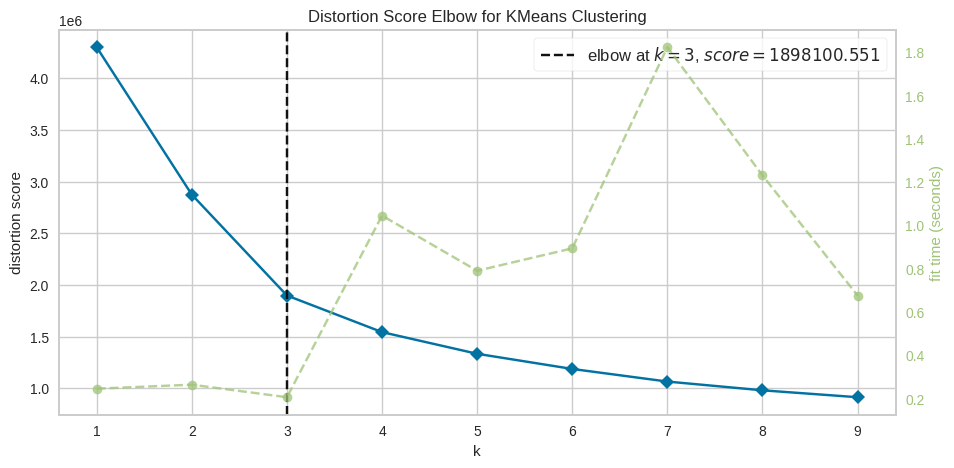

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
# prompt: en iyi sın-flandırma sayısını bulma

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10),size=(1080, 500),n_init='auto')

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()


In [17]:
kmeans = KMeans(n_clusters = 3, init='k-means++',random_state=42)
kmeans.fit(df)

# Now, print the silhouette score of this model

print("silhouette_score is :",silhouette_score(df, kmeans.labels_, metric='euclidean'))

silhouette_score is : 0.36666233758588146


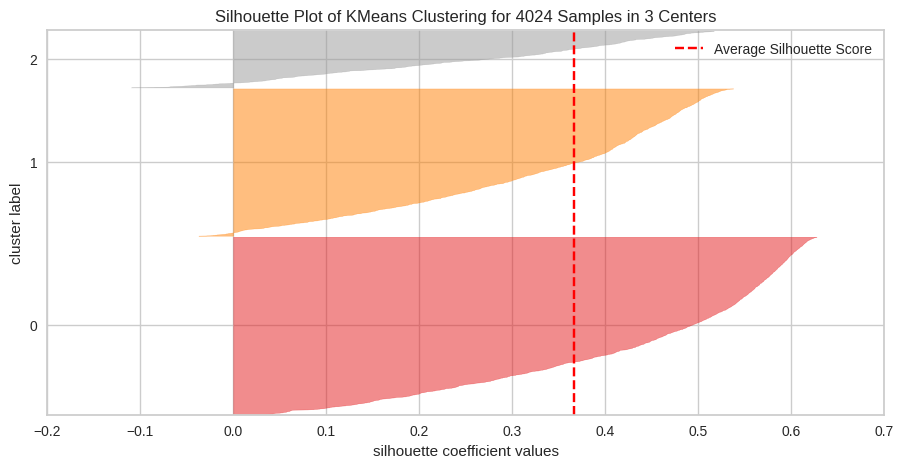

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4024 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans1 = KMeans(n_clusters = 3, init='k-means++',random_state=42)
visualizer = SilhouetteVisualizer(kmeans1,size=(1080, 500))

visualizer.fit(df)    # Fit the data to the visualizer
visualizer.show()

In [21]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)


In [23]:
kmeans.fit(df_std)

KMeans(n_clusters=3, random_state=42)

In [24]:
# Orijinal özelliklere sahip yeni bir veri çerçevesi oluşturup, her noktaya atanmış kümelerin bulunduğu yeni bir sütun ekliyoruz.
df_segm_kmeans= df_std.copy()
df_std[" Segment K-means"] = kmeans.labels_

df_segm_kmeans

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,0.397160,-0.349103,-1.025287,-0.632209,-1.043706,0.304678,1.351806,0.152963,-1.253661,0.267652,0.458107,1.190676,-0.618172,-0.492961
1,0.397160,-0.349103,0.281158,0.809974,0.535491,-0.679291,-0.205054,0.152963,0.214345,0.267652,0.458107,-0.044095,0.164807,-0.405695
2,0.397160,-1.289389,1.587604,2.252157,2.114687,-0.679291,-0.205054,0.152963,1.540287,0.267652,0.458107,-0.044095,0.556296,0.161530
3,0.397160,-0.349103,-1.025287,-0.632209,-1.043706,0.304678,1.351806,0.152963,-0.590691,0.267652,0.458107,-1.525820,-0.618172,0.554224
4,0.397160,-0.349103,0.281158,-0.632209,-0.254108,0.304678,1.351806,0.152963,0.498475,0.267652,0.458107,-1.402343,-0.618172,-0.929288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,-1.374649,-0.349103,-1.025287,-0.632209,-1.043706,-0.679291,-0.205054,0.152963,-1.016886,0.267652,0.458107,-1.649297,-0.618172,-0.972921
4020,0.397160,-1.289389,0.281158,0.809974,0.535491,-0.679291,-0.205054,0.152963,0.735251,0.267652,0.458107,-0.044095,0.752041,-0.100266
4021,0.397160,-0.349103,0.281158,-0.632209,-0.254108,-0.679291,-0.205054,0.152963,-0.401271,0.267652,-2.182898,-0.414526,-0.226682,-0.100266
4022,-3.146457,-1.289389,0.281158,-0.632209,-0.254108,-0.679291,-0.205054,0.152963,0.640541,0.267652,0.458107,-0.414526,-0.618172,0.030632


In [25]:
df_segm_analysis = df_std.groupby([' Segment K-means']).mean()
df_segm_analysis


,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
Segment K-means,,,,,,,,,,,,,,
0,-0.103770,0.011505,0.869401,1.617898,1.554527,-0.095864,0.367561,-0.652697,0.887419,-0.371704,-0.347331,0.703879,1.494794,-0.362748
1,0.020950,-0.012575,-0.192613,-0.370186,-0.346578,-0.398567,0.239114,0.152963,-0.200776,0.070455,0.056319,-0.144282,-0.344515,0.082622
2,0.042115,0.049478,-0.262564,-0.426580,-0.457973,2.246074,-1.803910,0.152963,-0.245975,0.175078,0.213852,-0.274157,-0.380940,0.097636


In [26]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i,n_init=10, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

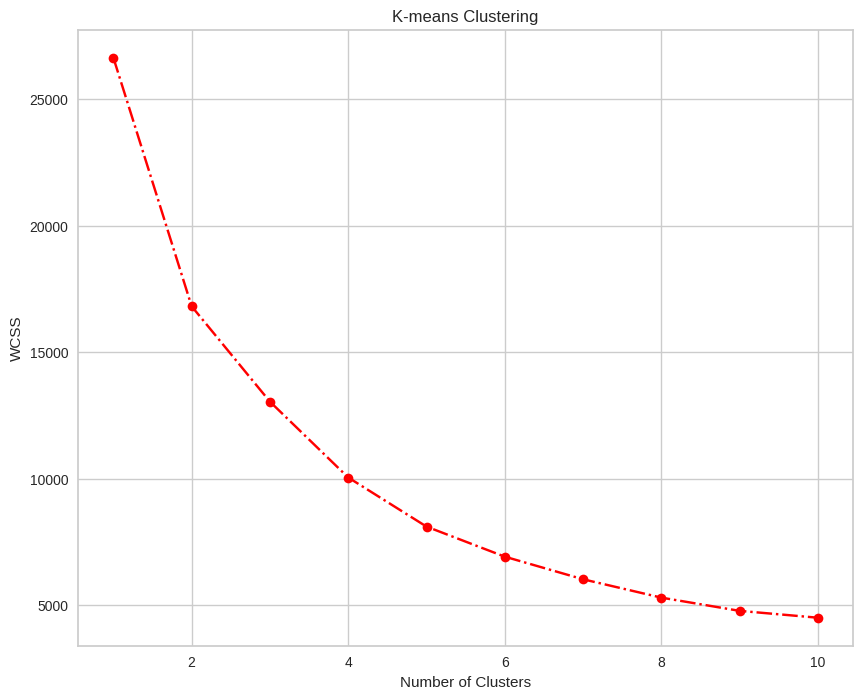

In [27]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [28]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [ ]:
# Artık veri setimizin bulunduğu segmentleri görüyoruz.

# Müşterileri kümelere göre gruplandıralım ve her değişkenin ortalama değerlerini görelim.

In [29]:
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=42)

In [30]:
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']

df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Component 1,Component 2,Component 3,Segment K-means PCA
0,2,1,0,0,0,1,3,1,4,1,1,24,1,60,-1.442530,0.442201,1.256944,1
1,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0.785812,-0.560455,0.074766,2
2,2,0,2,2,4,0,2,1,63,1,1,14,7,75,3.187202,-1.288002,-0.761041,0
3,2,1,0,0,0,1,3,1,18,1,1,2,1,84,-1.961779,0.351105,-0.040665,1
4,2,1,1,0,1,1,3,1,41,1,1,3,1,50,-0.567076,0.253017,-1.336977,2


In [31]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,,,,,,,,
0,1.739919,1.356855,1.262097,1.943548,3.925403,0.669355,2.338710,0.838710,42.250000,0.872984,0.739919,21.491935,15.028226,63.504032,3.809625,-0.300850,1.136478
1,1.792034,1.350524,0.379455,0.082180,0.536688,0.747170,2.010901,1.000000,19.805870,0.976101,0.906499,12.761845,1.922851,74.721593,-1.232634,-0.071788,0.195625
2,1.757655,1.420822,1.423447,0.528434,1.830271,0.580927,2.293963,0.989501,47.622922,0.869641,0.697288,14.589676,4.104987,67.536308,0.918860,0.280347,-0.901364


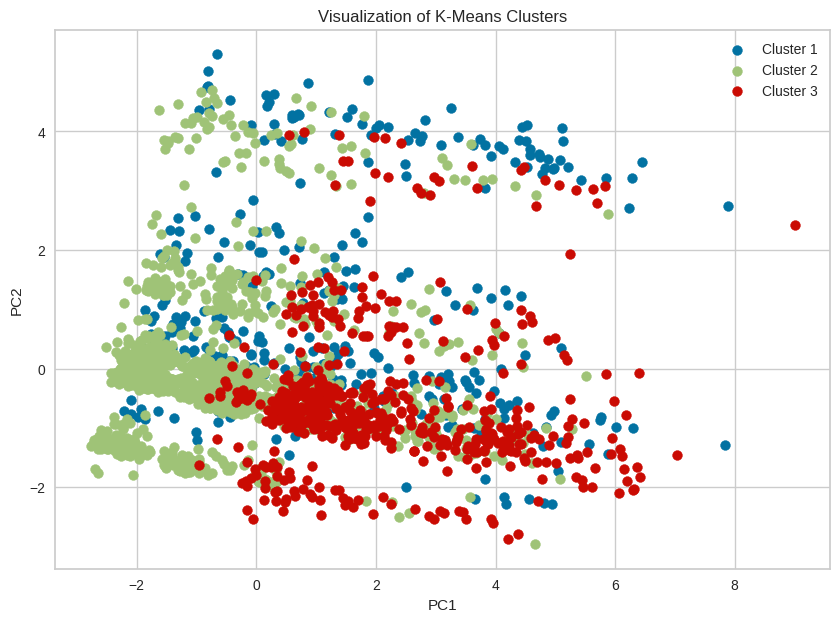

In [34]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

# Perform PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_std)

# Create a scatter plot of the data points, colored by their cluster
plt.figure(figsize=(10, 7))
for i in range(3):
    plt.scatter(df_pca[kmeans.labels_ == i, 0], df_pca[kmeans.labels_ == i, 1], s=50, label="Cluster {}".format(i + 1))
plt.title("Visualization of K-Means Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

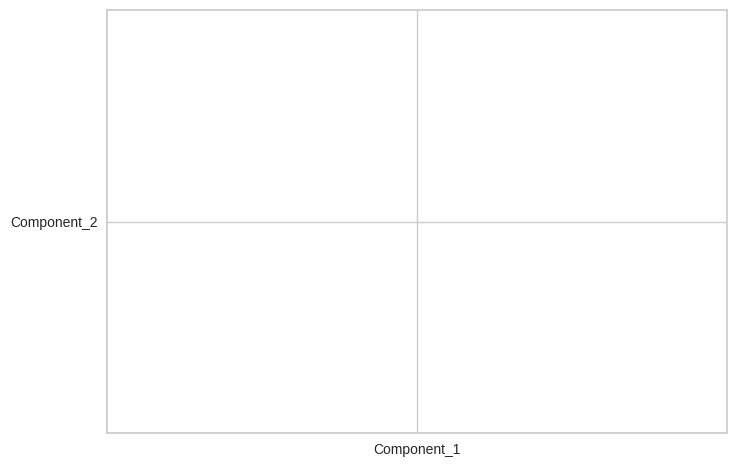

In [32]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

plt.scatter("Component_1" , "Component_2" ,"Component_3" , c=kmeans.labels_)
plt.show()